# My First Machine Learning Program

## Introduction
There is no better way to learn Machine Learning than to experiment with it! In this notebook you are step by step guided to do this. Challenge yourself in trying to understand the code and try to change the parameters.
You're probably not going to understand all the details but hopefully get a good feeling about the contents of the advanced part of the module and of how a data analytics/machine learning process could work.

First things first, we need a few libraries.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.21.5
pandas version: 1.4.4
scikit-learn version: 1.0.2
matplotlib version: 3.5.2


The algorithm you are going to use is known as k-NN (k-Nearest Neighbors) classification.

#### DIY
In Canvas more information is provided about kNN. Read through it and write down how you think the learning works.

## The supervised learning classification steps: overview

This notebook implements all specific tasks in applying supervised machine learning techniques (data preprocessing, data exploration and data modelling part of the data science):

* Preparing the data, 
* Analysing and visualising the data, 
* Cleaning the data, 
* Selecting features, 
* Dividing your data into a training and test set, 
* Training your Machine learning algorithm, 
* Applying the machine learning algorithm 
* and Evaluating its results.

You will learn more in detail on how to do each task in the advanced part of the module. For now, try to read the code, experiment with it and get the first touch with python and python libraries used for machine learning.

## Step 1 Preparing the data
The first step is to get the data. There are a lot of prepared datasets available on the internet. We've selected 2 very popular small datasets for you that are suitable for a classification. 
* Iris dataset (150 entries of 4 input features and 1 output label) 
* Wine dataset (178 entries of 13 input features and 1 output label)

#### DIY
Take a look at the website https://archive.ics.uci.edu/ml/index.php and find these datasets there. What information or metadata is available? List resources that explain the content of these datasets. 

In [2]:
### Downloading

In [3]:
df_iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")

#### DIY
Note that for the second dataset, the Wine dataset, no code is given throughout the notebook. Learn how to change the parameters in the code to achieve a similar result.

In [4]:
#Download Wine Data Set
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


### Exploring the iris dataset

In [5]:
df_iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
print('Iris dataset shape: {}'.format(df_iris.shape))
df_iris.head(5)

Iris dataset shape: (149, 5)


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### DIY: Exploring Wine dataset

In [6]:
#Explore Wine dataset
df_wine.columns = ['classID', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print('Wine dataset shape: {}'.format(df_wine.shape))
df_wine.head(14)

Wine dataset shape: (177, 14)


,classID,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
8,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
9,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510


## Step 2&3 Analysing and visualising the data & cleaning the data

In this process the features should be stored in a 2D NxM array (matrix) variable separate from the label which should be stored in a 1D array (or vector) of size N (a simple video on features and labels can be found at https://www.youtube.com/watch?v=rnv0-lG9yKU). 
N (# rows) represents the number of data points or entries, M (# columns) represents the number of features. If necessary, textual information should be removed or transformed into numerical data. 

#### Iris dataset

In order to apply certain (machine learning) algorithm, the selected features should have numeric value instead of text.

In [7]:
df_iris['Species-id'] = df_iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df_iris.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Species-id
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0


#### Boxplots
Now we can plot boxplots that will show us how are the values of certain features 
distributed per species-id

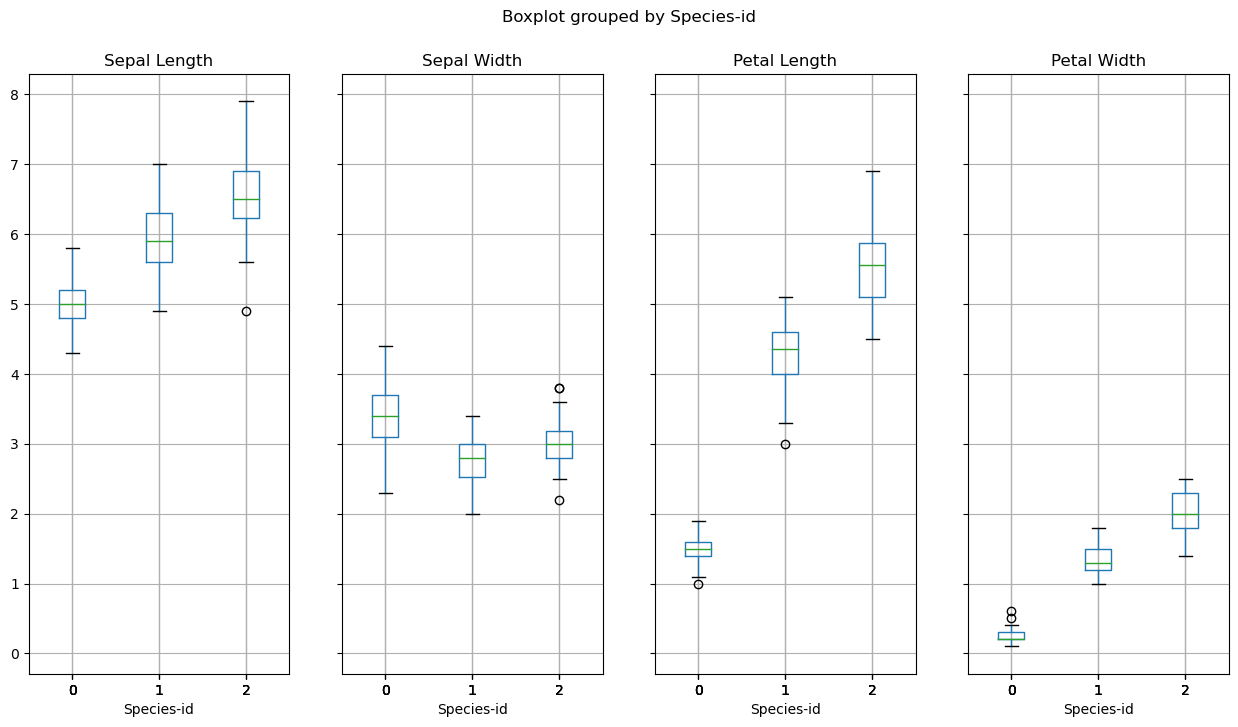

In [8]:
iris_features = tuple(df_iris.columns[:4].values)
df_iris.boxplot(column=iris_features, by='Species-id', figsize=(15,8), layout=(1,4));

#### Wine dataset

#### DIY: Create a boxplot 
Create a boxplot for Wine data set features:'Total phonols', 'Flavanoids', 'Nonflavanoid phenols'and 'Color intensity' per 'Class ID'

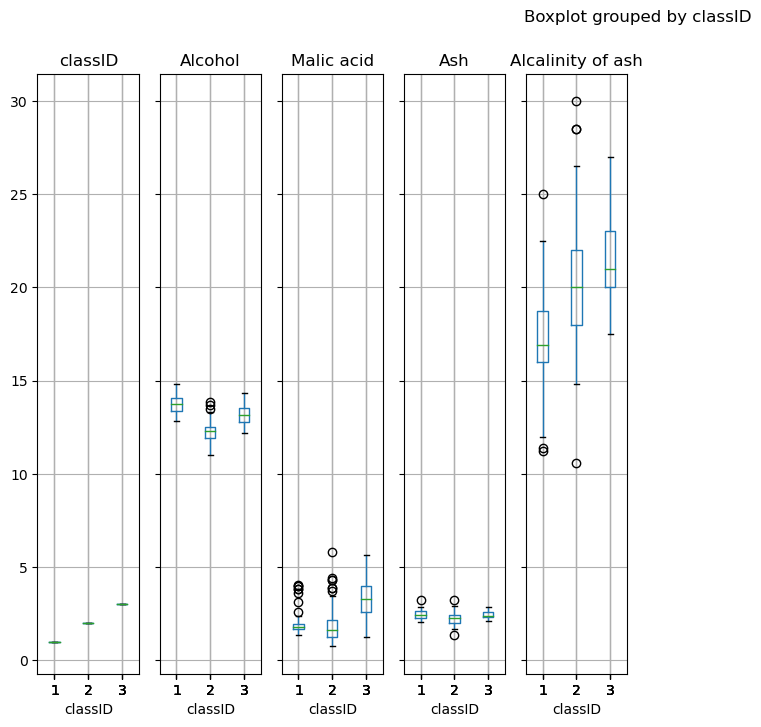

In [9]:
#### Create a boxplot
df_wine['Class ID'] = df_wine['classID'].map({'Total phonols': 0, 'Flavanoids': 1, 'Nonflavanoid phenols': 2, 'Color intensity': 3})
df_wine.head(5)

wine_features = tuple(df_wine.columns[:5].values)
df_wine.boxplot(column=wine_features, by='classID', figsize=(15,8), layout=(1,10));

## Step 4 Selecting features (and scaling them)
We're going to choose 2 features for label (class) 'Species-id'. It is important that both features use the same scale, otherwise the machine learning model will not be correct (for more detail about scaling see : https://www.youtube.com/watch?v=Y7m9MyPxcyQ).

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

#### Iris dataset - step 3

Iris types: [0 1 2]
The length of X_iris: 149


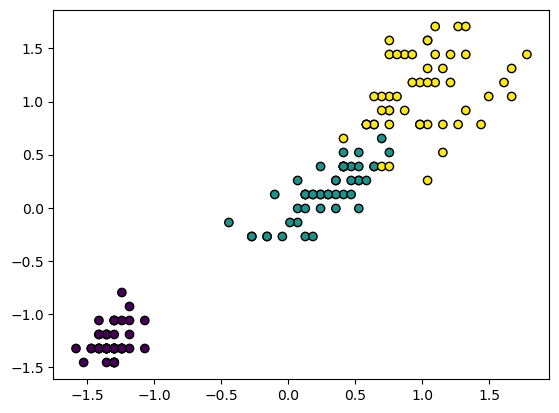

In [11]:
# Define X_iris and y_iris
X_iris = df_iris[['Petal Length', 'Petal Width']]
y_iris = df_iris['Species-id']
print('Iris types:', df_iris['Species-id'].unique())

# Normalize
scaler_iris = StandardScaler().fit(X_iris)
X_iris = scaler_iris.transform(X_iris)
print('The length of X_iris: {}'.format(len(X_iris)))

plt.scatter(X_iris[:,0], X_iris[:,1], edgecolors='k', c=y_iris)

#### DYI 
Select two features (think well about the selection) and one label for the Wine dataset. Scale and plot the selected features/label.

wine types: [1 2 3]
The length of X_wine: 177


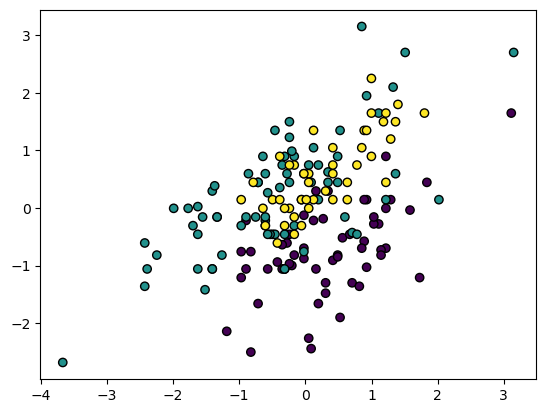

In [12]:
#select 2 features and a label

# Define X_iris and y_iris
X_wine = df_wine[['Ash', 'Alcalinity of ash']]
y_wine = df_wine['classID']
print('wine types:', df_wine['classID'].unique())

# Normalize
scaler_wine = StandardScaler().fit(X_wine)
X_wine = scaler_wine.transform(X_wine)
print('The length of X_wine: {}'.format(len(X_wine)))

plt.scatter(X_wine[:,0], X_wine[:,1], edgecolors='k', c=y_wine)

## Step 5 Dividing your data into a training and test set

Before mahine learning can be run, it is important to split the dataset to two parts:
training data to train the model and testing data to be able to see whether the model has expected results (for more detail see: https://www.youtube.com/watch?v=P2NqrFp8usY)
Let’s use the symbol X for the scaled 2D input feature array, and the symbol y for the 1D output label vector.
We will split the data into a train set and test set.

#### Iris dataset

Train shape: (111, 2) (111,)
Test shape: (38, 2) (38,)


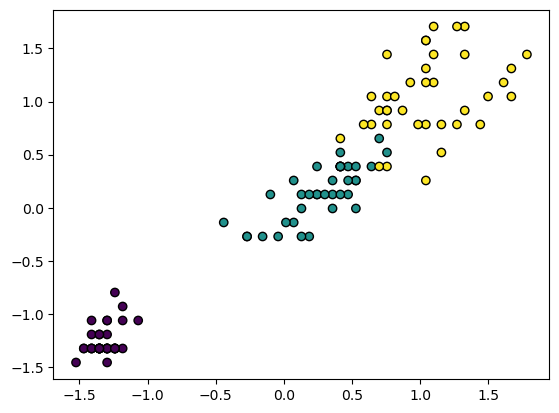

In [13]:
# Split in train and test sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.25)
print('Train shape:', X_train_iris.shape, y_train_iris.shape)
print('Test shape:', X_test_iris.shape, y_test_iris.shape)

plt.scatter(X_train_iris[:,0], X_train_iris[:,1], edgecolors='k', c=y_train_iris)

#### Wine dataset

Train shape: (132, 2) (132,)
Test shape: (45, 2) (45,)


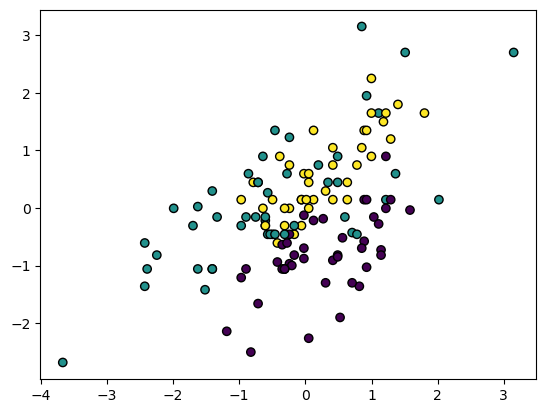

In [14]:
# Split in train and test sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.25)
print('Train shape:', X_train_wine.shape, y_train_wine.shape)
print('Test shape:', X_test_wine.shape, y_test_wine.shape)

plt.scatter(X_train_wine[:,0], X_train_wine[:,1], edgecolors='k', c=y_train_wine)

## Step 6&7&8 Training, applying and evaluating your Machine learning algorithm

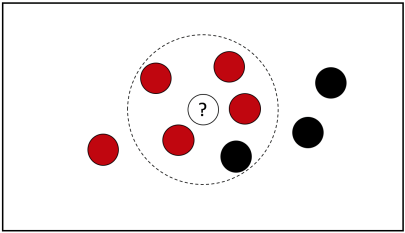
<i>Figure 1: A data point is classified by majority votes from its 5 nearest neighbors. Here, the unknown point would be classified as red, since 4 out of 5 neighbors are red.</i>

The library sklearn contains an implementation of the NearestNeighbors algorithm:

In [15]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from matplotlib.colors import ListedColormap

We create a function that takes the features and labels of the data as parameters, as the number of neighbors. We next predict the class for all possible values in the two dimensions. These results are plotted, visualising the decision boundaries between predicted classes.

In [16]:
def plot_nearest_neighbors(X_train, X_test, Y_train, Y_test, k, classlabels, featurelabels, weight):
    print('Number of training points: ',X_train.size)
    possible_classes = Y_train.unique()
    
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X_train)
    distances, indices = nbrs.kneighbors(X_test)
    
    nb_of_classes = classlabels.unique().size
    
    h = .02  # step size in the mesh

    ## Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    ## we create an instance of Neighbours Classifier and fit the data.
    clf_data = KNeighborsClassifier(k, weights=weight)
    clf_data.fit(X_train, Y_train)

    ## Plot the decision boundary. For that, we will assign a color to each
    ## possible point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

    Z_data = clf_data.predict(np.c_[xx.ravel(), yy.ravel()])

    ## Put the result into a color plot
    Z_data = Z_data.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z_data, cmap=cmap_light, shading='auto')

    ## Plot also the training points
    #print(Y_train)
    #print(X_train[0])

    for i in possible_classes:
        x1s_data = X_train[:, 0][Y_train.values == i]
        x2s_data = X_train[:, 1][Y_train.values == i]
        plt.scatter(x1s_data, x2s_data, cmap=cmap_bold, edgecolors='k', label=i)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("%i-Class classification (k = %i, weights = '%s')" % (nb_of_classes, k, weight))
    plt.xlabel(featurelabels[0])
    plt.ylabel(featurelabels[1])
    plt.legend()
    plt.show()
        
    return clf_data         

#### Plotting the decision boundary for the Iris dataset

Number of training points:  222


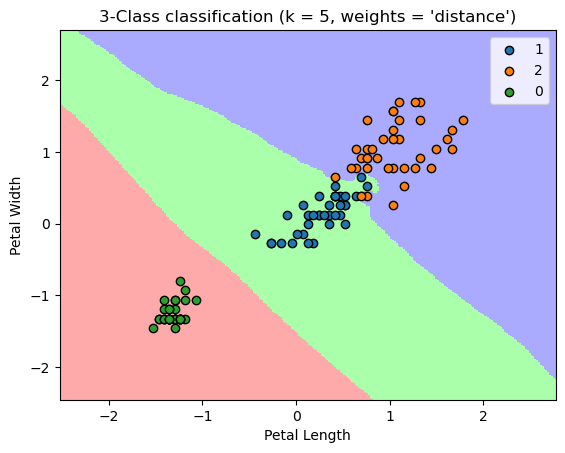

In [17]:
clf_iris = plot_nearest_neighbors(X_train_iris, X_test_iris, y_train_iris, y_test_iris, 5, df_iris.Species, ['Petal Length', 'Petal Width'], 'distance')


#### DYI
Plotting the decision boundary for the Wine dataset

Number of training points:  264


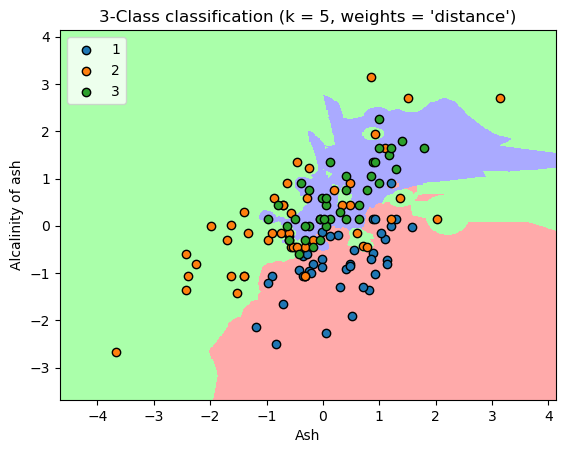

In [18]:
clf_wine = plot_nearest_neighbors(X_train_wine, X_test_wine, y_train_wine, y_test_wine, 5, df_wine.classID, ['Ash', 'Alcalinity of ash'], 'distance')

### Step 6 - Result of learning: accuracy
The accuracy of your KNN algorithm is based on the correct predicted labels of the hold-out test set.

#### Iris dataset

In [19]:
#Evaluate performance (with test set)
print('Number of test points: ',X_test_iris.size)
y_pred_iris = clf_iris.predict(X_test_iris)

Number of test points:  76


Accuracy score for the Iris Dataset:

In [20]:
metrics.accuracy_score(y_test_iris, y_pred_iris)

0.9736842105263158

#### DIY Wine dataset

Copy the evaluation code above, and change it to calculate it for the wine dataset.

Advanced: make a function of the accurancy code and apply to the machine dataset.

In [21]:
print('Number of test points: ',X_test_wine.size)
y_pred_wine = clf_wine.predict(X_test_wine)

metrics.accuracy_score(y_test_wine, y_pred_wine)

Number of test points:  90


0.5555555555555556